#Dependencies

In [ ]:
!pip install opencv-python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from skimage import data, color
from skimage.filters import threshold_otsu
from tensorflow import reshape , matmul, reduce_sum

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Functions used

In [ ]:
def load_red_roses():
    return plt.imread("red_roses.png")

def load_page_image():
    return plt.imread("page.jpg")

def load_chess_image():
    return plt.imread("chess_gray.png")

def load_woman():
    return plt.imread("woman.png")

def load_flipped_seville():
    return plt.imread("flipped_seville.png")

def load_lena():
    return plt.imread("lena.png")

def load_lools_image():
    return plt.imread("shapes52.jpg")

def load_soaps_image():
    return plt.imread("soaps.jpg")

def load_building_image():
    return plt.imread("toa-sharp-def-3.jpg")

def load_chest_ray_x():
    return plt.imread("contrast_00000109_005.png")

def load_aerial_image():
    return plt.imread("aerial.png")

def load_rotate_cat():
    return plt.imread("cat.jpg")

def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

def manual_rgb2gray(rgb_img):
    return np.array((rgb_img[:,:,0]*0.29 + rgb_img[:,:,1]*0.59 + rgb_img[:,:,2]*0.11)).astype(int)


q1

##Code1

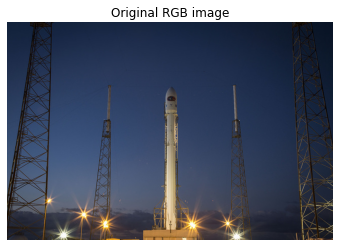

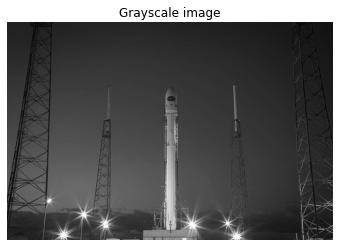

In [ ]:


# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

##Code2

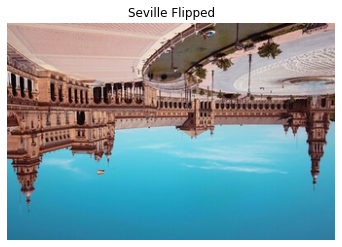

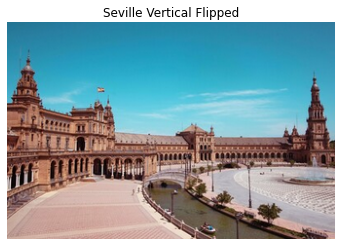

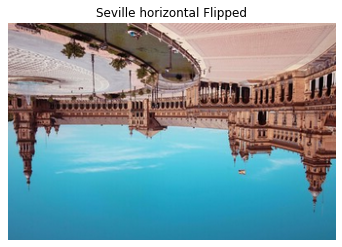

In [ ]:
flipped_seville = load_flipped_seville()

# Show original image
show_image(flipped_seville, 'Seville Flipped')

# Flip the image vertically
seville_vertical_flip = np.flipud(flipped_seville)

# Show image flippped vertically
show_image(seville_vertical_flip, 'Seville Vertical Flipped')

# Flip the image horizontally
seville_horizontal_flip = np.fliplr(flipped_seville)

# Show image flipped horizontally
show_image(seville_horizontal_flip, 'Seville horizontal Flipped')



##Code3

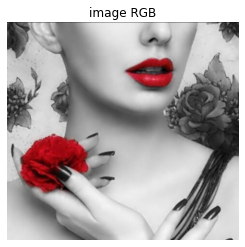

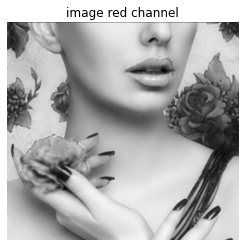

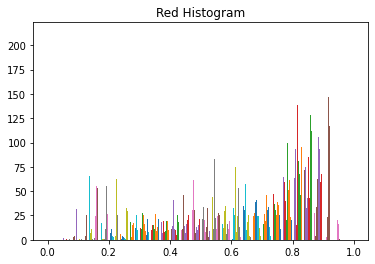

In [ ]:

image = load_red_roses()

# Show original image
show_image(image,'image RGB')

# Obtain the red channel
red_channel = image[:,:,0]

# Show original image
show_image(red_channel,'image red channel')

# Plot the red histogram with bins in a range of 256
plt.hist(red_channel, bins=30)

# Set title and show
plt.title('Red Histogram')
plt.show()

##code4

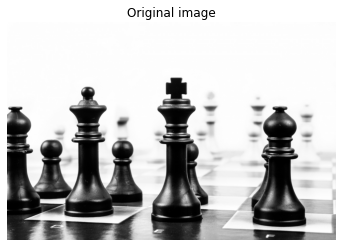

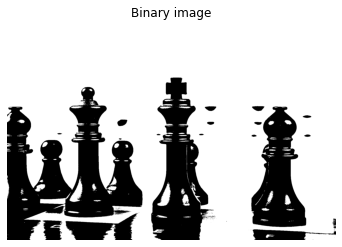

In [ ]:

# Import the otsu threshold function


chess_pieces_image = load_chess_image()

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(chess_pieces_image)

#show original image
show_image(chess_pieces_image,'Original image')

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the binary image
show_image(binary, 'Binary image')

##code5

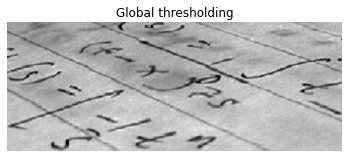

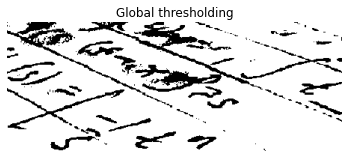

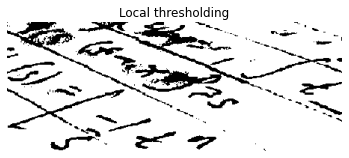

In [ ]:
from skimage.color import rgb2gray

page_image = manual_rgb2gray(load_page_image())
# Show original image
show_image(page_image, 'Global thresholding')

# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(page_image)

# Obtain the binary image by applying global thresholding
binary_global =  page_image>global_thresh 

# Show the binary image obtained
show_image(binary_global, 'Global thresholding')

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_otsu(page_image, block_size)

# Obtain the binary image by applying local thresholding
binary_local = page_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

#q2

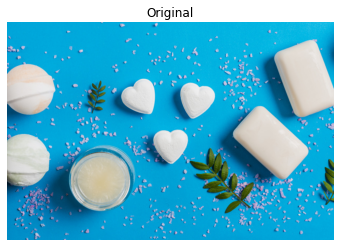

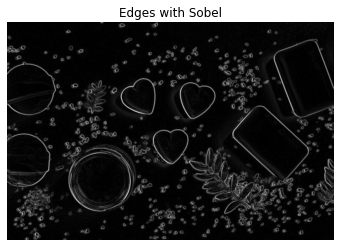

In [ ]:
from skimage.filters import sobel

# Import the filters module and sobel function
from skimage.color import rgb2gray

#from PDI.src.pdi_utils import load_soaps_image,show_image

soaps_image = load_soaps_image()

# Make the image grayscale
soaps_image_gray = rgb2gray(soaps_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

# Show original and resulting image to compare
show_image(soaps_image, "Original")
show_image(edge_sobel, "Edges with Sobel")

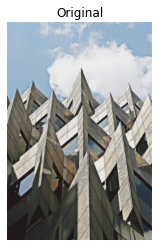

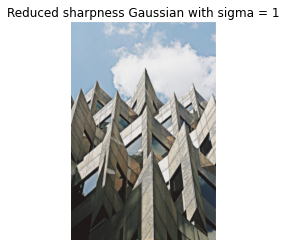

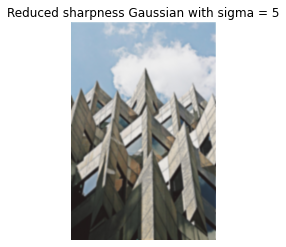

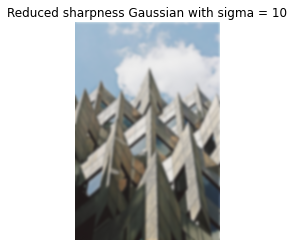

In [ ]:
from skimage.filters import gaussian
#from PDI.src.pdi_utils import load_building_image,show_image

building_image = load_building_image()

# Apply filter sigma = 1
gaussian_image = gaussian(building_image, sigma=1,multichannel = True)

# Show original and resulting image to compare
show_image(building_image, "Original")
show_image(gaussian_image, "Reduced sharpness Gaussian with sigma = 1")

# Apply gaussian filter sigma = 5
gaussian_image = gaussian(building_image, sigma=5,multichannel = True)

# Show resulting image to compare
show_image(gaussian_image, "Reduced sharpness Gaussian with sigma = 5")

# Apply filter sigma = 10
gaussian_image = gaussian(building_image, sigma=10,multichannel = True)

# Show resulting image to compare
show_image(gaussian_image, "Reduced sharpness Gaussian with sigma = 10")

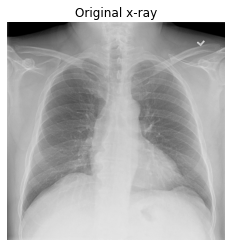

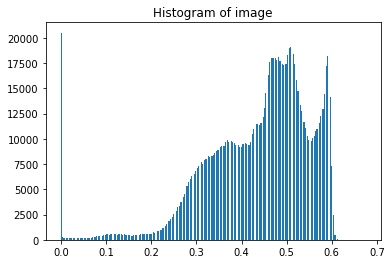

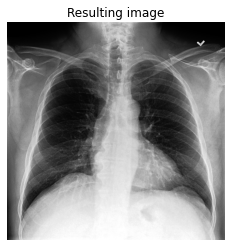

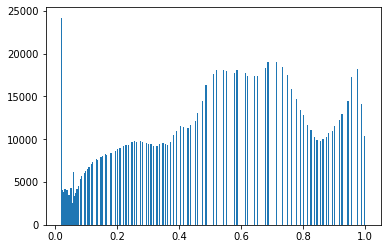

In [ ]:
import matplotlib.pyplot as plt
#from PDI.src.pdi_utils import show_image, load_chest_ray_x
from skimage import exposure

chest_xray_image = load_chest_ray_x()
# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=255) #hist chest_xray_image 255
plt.show()

# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(chest_xray_image)

# Show the resulting image
show_image(xray_image_eq, 'Resulting image')

# Show the histogram equalized
plt.hist(xray_image_eq.ravel(), bins=255)
plt.show()

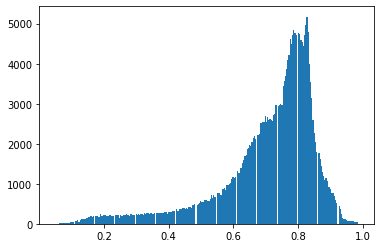

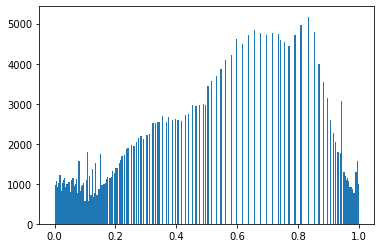

media de valores de pixel na imagem não eq:  180.42611360549927
media de valores de pixel  na imagem eq:  128.64616020198648
variancia de valores de pixel na imagem não eq:  6.070760395377874
variancia de valores de pixel  na imagem eq:  21.46423599902202
entropia de valores do histograma da imagem não eq:  7.656871647011916
entropia de valores do histograma da imagem eq:  4.4318110213702315
numero de pixels com probabilidde de ocorrencia menor que, 0.2  na imagem não eq:  179
numero de pixels com probabilidde de ocorrencia menor que, 0.2  na imagem eq:  162
media de valores de pixel de baixa probablidade de ocorrencia na imagem não eq:  101.04469273743017
media de valores de pixel de baixa probablidade  de ocorrencia na imagem eq:  132.9506172839506


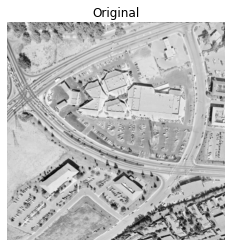

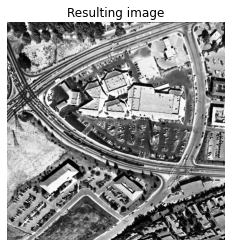

In [ ]:
from skimage import exposure
#from PDI.src.pdi_utils import show_image,  load_aerial_image
from scipy.stats import entropy
import matplotlib.pyplot as plt
import numpy as np

def compute_entropy(labels, base=None):
    value,counts = np.unique(labels, return_counts=True)
    return entropy(counts, base=base)

image_aerial = load_aerial_image()

# calcular e mostrar o histograma da imagem
hist_n_eq = plt.hist(image_aerial.ravel(), bins=255)
plt.show()

# realizar a equalização do histograma
image_eq =  exposure.equalize_hist(image_aerial)

# calcular e mostrar o histograma da imagem equalizada
hist_eq = plt.hist(image_eq.ravel(), bins=255)
plt.show()

# determinar a media do valor dos pixels que ocorrem na imagem não equalizada
img_mean_n_eq = np.mean(image_aerial)*255

# determinar a media do valor dos pixels que ocorrem na imagem  equalizada
img_mean_eq = np.mean(image_eq)*255

# determinar a variancia do valor dos pixels que ocorrem na imagem não equalizada
img_var_n_eq = np.var(image_aerial)*255

# determinar a variancia do valor dos pixels que ocorrem na imagem  equalizada
img_var_eq = np.var(image_eq)*255

# determinar os pixels que ocorrem com menor frequência da imagem não equalizada
l_freq = 0.2
low_freq_region_n_eq = np.where(hist_n_eq[0] < l_freq  * np.max(hist_n_eq[0]))

# determinar os pixels que ocorrem com menor frequência da imagem equalizada
low_freq_region_eq = np.where(hist_eq[0] < l_freq  * np.max(hist_eq[0]))

# determinar a media do valor dos pixels que ocorrem com menor frequência da imagem não equalizada
mean_pixel_low_freq_n_eq = np.mean(low_freq_region_n_eq[0])

# determinar a media do valor dos pixels que ocorrem com menor frequência da imagem equalizada
mean_pixel_low_freq_eq = np.mean(low_freq_region_eq[0])

# determinar a entropia do histograma da imagem não equalizada
hist_entropy_n_eq = compute_entropy(hist_n_eq[0], base=2)

# determinar a entropia do histograma da imagem equalizada
hist_entropy_eq = compute_entropy(hist_eq[0], base=2)

#Mostrar os valores calculdos
print("media de valores de pixel na imagem não eq: ",img_mean_n_eq )
print("media de valores de pixel  na imagem eq: ",img_mean_eq )

print("variancia de valores de pixel na imagem não eq: ",img_var_n_eq )
print("variancia de valores de pixel  na imagem eq: ",img_var_eq)

print("entropia de valores do histograma da imagem não eq: ",hist_entropy_n_eq )
print("entropia de valores do histograma da imagem eq: ",hist_entropy_eq)

print("numero de pixels com probabilidde de ocorrencia menor que,", l_freq , " na imagem não eq: ",len(low_freq_region_n_eq[0]))
print("numero de pixels com probabilidde de ocorrencia menor que,", l_freq , " na imagem eq: ",len(low_freq_region_eq[0]))

print("media de valores de pixel de baixa probablidade de ocorrencia na imagem não eq: ",mean_pixel_low_freq_n_eq)
print("media de valores de pixel de baixa probablidade  de ocorrencia na imagem eq: ",mean_pixel_low_freq_eq)

# Show the original and resulting image
show_image(image_aerial, 'Original')

show_image(image_eq, 'Resulting image')

In [ ]:
np.std([123,32])

45.5

#q3


In [ ]:
model = [[ 1. , 0., -1.]]

letterK = [[1., 0., 1.],
           [1., 1., 0.],
           [1., 0., 1.]]
letterX = [[1., 0., 1.],
           [0., 1., 0.],
           [1., 0., 1.]]
# Reshape model from a 1x3 to a 3x1 tensor
model = reshape(model, (3, 1))

# Multiply letter K by model
output1 = matmul(letterK , model)

# Sum over output and print prediction using the numpy method
prediction1 = reduce_sum(output1)
print(prediction1.numpy())

# Multiply letter X by model
output2 = matmul(letterX, model)

# Sum over output and print prediction using the numpy method
prediction2 = reduce_sum(output2)
print(prediction2.numpy())

1.0
0.0


In [ ]:
from tensorflow import Variable, keras, ones

features = [[ 2. , 2., 43.]]

# Initialize bias1
bias1 = Variable(1.0)

# Initialize weights1 as 3x2 variable of ones
weights1 = Variable(ones((3, 2)))

# Perform matrix multiplication of features and weights1
product1 = matmul(features,weights1)

# Apply sigmoid activation function to product1 + bias1
dense1 = keras.activations.sigmoid(product1 + bias1)

# Print shape of dense1
print("\n dense1's output shape: {}".format(dense1.shape))

# Initialize bias2 and weights2
bias2 = Variable(1.0)
weights2 = Variable(ones((2,1)))

# Perform matrix multiplication of dense1 and weights2
product2 = matmul(dense1,weights2)

# Apply activation to product2 + bias2 and print the prediction
prediction = keras.activations.sigmoid(product2 + bias2)
print('\n prediction: {}'.format(prediction.numpy()[0,0]))
print('\n actual: 1')


 dense1's output shape: (1, 2)

 prediction: 0.9525741338729858

 actual: 1


In [ ]:
from tensorflow import Variable, keras, ones, matmul
borrower_features = Variable([[ 2. , 2., 43.]])

# Define the first dense layer
dense1 = keras.layers.Dense(7, activation='sigmoid')(borrower_features)

# Define a dense layer with 3 output nodes
dense2 = keras.layers.Dense(3, activation='sigmoid')(dense1)

# Define a dense layer with 1 output node
predictions = keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print the shapes of dense1, dense2, and predictions
print('\n shape of dense1: ', dense1.shape)
print('\n shape of dense2: ', dense2.shape)
print('\n shape of predictions: ', predictions.shape)


 shape of dense1:  (1, 7)

 shape of dense2:  (1, 3)

 shape of predictions:  (1, 1)


In [ ]:
from tensorflow import keras

# Define a Keras sequential model
model = keras.Sequential()

# Define the first dense layer
model.add(keras.layers.Dense(16, activation='relu', input_shape=(784,)))

# Define the second dense layer

model.add(keras.layers.Dense(8, activation='relu'))

# Define the output layer
model.add(keras.layers.Dense(4,activation='softmax'))

# Print the model architecture
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                12560     
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
Total params: 12,732
Trainable params: 12,732
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from tensorflow import keras

model = keras.Sequential()

# Define the first dense layer
model.add(keras.layers.Dense(16, activation='relu', input_shape=(784,)))

# Apply dropout to the first layer's output
model.add(keras.layers.Dropout(0.25))

# Define the output layer

model.add(keras.layers.Dense(4, activation='softmax', input_shape=(784,)))

# Compile the model
model.compile(optimizer = 'adam', loss='categorical_crossentropy')

# Print a model summary
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                12560     
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 4)                 68        
                                                                 
Total params: 12,628
Trainable params: 12,628
Non-trainable params: 0
_________________________________________________________________
None
